In [1]:
import pandas as pd
import numpy as np
from string import ascii_letters
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from numpy import median
import pylab
from numpy import polyfit, poly1d, linspace

In [2]:
def acquire():
    data = pd.read_csv('hfi_cc_2018.csv')
    return data

df = acquire()

In [3]:
def wrangle(data):
    data = pd.read_csv('hfi_cc_2018.csv')
    null_cols = data.isnull().sum()
    null_cols[null_cols > 0].head()
    data.columns
    new_columns = ['year', 'countries', 'pf_rol_civil', 'pf_association_association', 'pf_expression', 
                   'pf_identity_sex', 'pf_score', 'ef_score', 'hf_score']
    data = data[new_columns]
    data = data.rename(index=str, columns={"year": "Year", "countries": "Country", 
                                           "pf_rol_civil": "Civil_justice", 
                                           "pf_association_association": "Freedom_of_association",
                                           "pf_expression": "Freedom_of_expression", 
                                           "pf_identity_sex": "Same_sex_relationships", 
                                           "pf_score": "Personal_Freedom",
                                           "ef_score": "Economic_Freedom",
                                           "hf_score": "Human_Freedom"})
    null_cols = data.isnull().sum()
    null_cols[null_cols > 0]
    before = len(data)
    data = data.drop_duplicates()
    after = len(data)
    print('Number of duplicate records dropped: ', str(before - after))
    data[data.isnull().any(axis=1)].head()
    data = data.dropna()
    return data

data = wrangle(df)

Number of duplicate records dropped:  0


In [4]:
data.head()

,Year,Country,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
0,2016,Albania,4.547244,10.0,8.607143,10.0,7.596281,7.54,7.568140
3,2016,Argentina,5.791960,7.5,8.738095,10.0,8.099696,4.84,6.469848
5,2016,Australia,7.525648,10.0,9.392857,10.0,9.184438,7.98,8.582219
6,2016,Austria,7.872188,10.0,9.333333,10.0,9.246948,7.58,8.413474
10,2016,Bangladesh,3.712171,5.0,7.041990,5.0,5.302600,6.30,5.801300


In [5]:
def analyze1(data):
    year_an = int(input('Escribe el año a partir del cual quieres analizar los datos: '))
    column_an = str(input('Escribe el índice por el cual quieres ordenar los datos: '))
    years = data["Year"]
    drop_cols = list(years[years < year_an].index)
    data_an = data.drop(drop_cols, axis=0)
    data_an_top5 = data_an.sort_values(by=column_an, ascending=False).head()
    data_an_last5 = data_an.sort_values(by=column_an, ascending=True).head()
    stats_top = data_an_top5.describe().transpose()
    stats_last = data_an_last5.describe().transpose()
    return data_an_top5, data_an_last5, stats_top,stats_last

data_an_top5, data_an_last5, stats_top, stats_last = analyze1(data)

Escribe el año a partir del cual quieres analizar los datos: 2016
Escribe el índice por el cual quieres ordenar los datos: Human_Freedom


In [6]:
def analyze2(data):
    index_an = str(input('Escribe qué valor quieres que haga de índice: '))
    column_an2 = str(input('Escribe el primer índice por el cual quieres comparar los datos: '))
    column_an3 = str(input('Escribe el segundo índice por el cual quieres comparar los datos: '))
    table_top = pd.pivot_table(data_an_top5, values=[column_an2, column_an3], index=index_an, 
                        aggfunc={column_an2: np.mean, column_an3: np.mean})
    table_last = pd.pivot_table(data_an_last5, values=[column_an2, column_an3], index=index_an, 
                        aggfunc={column_an2: np.mean, column_an3: np.mean})
    return table_top, table_last

table_top, table_last = analyze2(data)

Escribe qué valor quieres que haga de índice: Year
Escribe el primer índice por el cual quieres comparar los datos: Civil_justice
Escribe el segundo índice por el cual quieres comparar los datos: Human_Freedom


Escribe uno de los 3 países que vas a analizar de forma conjunta: New Zealand
Escribe el segundo de los 3 países que vas a analizar de forma conjunta: Spain
Escribe el tercero de los 3 países que vas a analizar de forma conjunta: Venezuela
Escribe por qué valor quieres que se ordene el análisis: Year
Escribe el primer índice por el cual quieres comparar los datos: Civil_justice
Escribe el segundo índice por el cual quieres comparar los datos: Human_Freedom
Escribe el año inicial a partir del cual quieres analizar los datos: 2008
Escribe el año final en el que quieres acabar el análisis: 2016
La variación ANUAL de Civil_justice y de Human_Freedom en New Zealand durante los últimos 8 años ha sido respectivamente de un 0.45%, y de un -0.03%.
La variación TOTAL de Civil_justice y de Human_Freedom en New Zealand entre 2008 y 2016 ha sido respectivamente de un 3.65%, y de un -0.26%.
La variación ANUAL de Civil_justice y de Human_Freedom en Spain durante los últimos 8 años ha sido respectivam

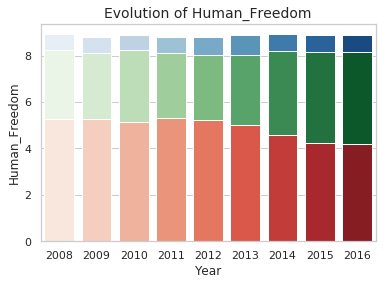

In [8]:
def analyze3(data):
    country_an = str(input('Escribe uno de los 3 países que vas a analizar de forma conjunta: '))
    country_an2 = str(input('Escribe el segundo de los 3 países que vas a analizar de forma conjunta: '))
    country_an3 = str(input('Escribe el tercero de los 3 países que vas a analizar de forma conjunta: '))
    index_an2 = str(input('Escribe por qué valor quieres que se ordene el análisis: '))
    column_an4 = str(input('Escribe el primer índice por el cual quieres comparar los datos: '))
    column_an5 = str(input('Escribe el segundo índice por el cual quieres comparar los datos: '))
    year1 = int(input('Escribe el año inicial a partir del cual quieres analizar los datos: '))
    year2 = int(input('Escribe el año final en el que quieres acabar el análisis: '))
    z = int(int(year2) - int(year1))

    data_new_zealand = data[(data['Country']==country_an)]
    data_new_zealand = data_new_zealand.sort_values(by=index_an2, ascending=False)
    columns_analysis = [index_an2, column_an4, column_an5]
    stats_new_zealand = data_new_zealand[columns_analysis]
    stats_new_zealand = stats_new_zealand.set_index(index_an2)
    stats_new_zealand_change = stats_new_zealand.pct_change()
    title = 'Evolution of ' + str(column_an5)
    sns.set(style="whitegrid")
    zea_freedom = sns.barplot(x=index_an2, y=column_an5, data=data_new_zealand, palette="Blues")
    plt.title(title, fontsize=14)
    zea_civil_year = ((stats_new_zealand.loc[year2, column_an4]/stats_new_zealand.loc[year1, column_an4])**(1/z)-1)*100
    zea_civil = ((stats_new_zealand.loc[year2, column_an4]/stats_new_zealand.loc[year1, column_an4])-1)*100
    zea_freedom_year = ((stats_new_zealand.loc[year2, column_an5]/stats_new_zealand.loc[year1, column_an5])**(1/z)-1)*100
    zea_freedom = ((stats_new_zealand.loc[year2, column_an5]/stats_new_zealand.loc[year1, column_an5])-1)*100
    print("La variación ANUAL de " + str(column_an4) + " y de " + str(column_an5) + " en " + str(country_an) + " durante los últimos " + str(z) + " años ha sido respectivamente de un " + str(round(zea_civil_year, 2)) + "%, y de un " + str(round(zea_freedom_year, 2)) + "%.")
    print("La variación TOTAL de " + str(column_an4) + " y de " + str(column_an5) + " en " + str(country_an) + " entre " + str(year1) + " y " + str(year2) + " ha sido respectivamente de un " + str(round(zea_civil, 2)) + "%, y de un " + str(round(zea_freedom, 2)) + "%.")

    data_spain = data[(data['Country']==country_an2)]
    data_spain = data_spain.sort_values(by=index_an2, ascending=False)
    stats_spain = data_spain[columns_analysis]
    stats_spain = stats_spain.set_index(index_an2)
    stats_spain_change = stats_spain.pct_change()
    title = 'Evolution of ' + str(column_an5)
    sns.set(style="whitegrid")
    spa_freedom = sns.barplot(x=index_an2, y=column_an5, data=data_spain, palette="Greens")
    plt.title(title, fontsize=14)
    spa_civil_year = ((stats_spain.loc[year2, column_an4]/stats_spain.loc[year1, column_an4])**(1/z)-1)*100
    spa_civil = ((stats_spain.loc[year2, column_an4]/stats_spain.loc[year1, column_an4])-1)*100
    spa_freedom_year = ((stats_spain.loc[year2, column_an5]/stats_spain.loc[year1, column_an5])**(1/z)-1)*100
    spa_freedom = ((stats_spain.loc[year2, column_an5]/stats_spain.loc[year1, column_an5])-1)*100
    print("La variación ANUAL de " + str(column_an4) + " y de " + str(column_an5) + " en " + str(country_an2) + " durante los últimos " + str(z) + " años ha sido respectivamente de un " + str(round(spa_civil_year, 2)) + "%, y de un " + str(round(spa_freedom_year, 2)) + "%.")
    print("La variación TOTAL de " + str(column_an4) + " y de " + str(column_an5) + " en " + str(country_an2) + " entre " + str(year1) + " y " + str(year2) + " ha sido respectivamente de un " + str(round(spa_civil, 2)) + "%, y de un " + str(round(spa_freedom, 2)) + "%.")

    data_venezuela = data[(data['Country']==country_an3)]
    data_venezuela = data_venezuela.sort_values(by=index_an2, ascending=False)
    stats_venezuela = data_venezuela[columns_analysis]
    stats_venezuela = stats_venezuela.set_index(index_an2)
    stats_venezuela_change = stats_venezuela.pct_change()
    title = 'Evolution of ' + str(column_an5)
    sns.set(style="whitegrid")
    ven_freedom = sns.barplot(x=index_an2, y=column_an5, data=data_venezuela, palette="Reds")
    plt.title(title, fontsize=14)
    ven_civil_year = ((stats_venezuela.loc[year2, column_an4]/stats_venezuela.loc[year1, column_an4])**(1/z)-1)*100
    ven_civil = ((stats_venezuela.loc[year2, column_an4]/stats_venezuela.loc[year1, column_an4])-1)*100
    ven_freedom_year = ((stats_venezuela.loc[year2, column_an5]/stats_venezuela.loc[year1, column_an5])**(1/z)-1)*100
    ven_freedom = ((stats_venezuela.loc[year2, column_an5]/stats_venezuela.loc[year1, column_an5])-1)*100
    print("La variación ANUAL de " + str(column_an4) + " y de " + str(column_an5) + " en " + str(country_an3) + " durante los últimos " + str(z) + " años ha sido respectivamente de un " + str(round(ven_civil_year, 2)) + "%, y de un " + str(round(ven_freedom_year, 2)) + "%.")
    print("La variación TOTAL de " + str(column_an4) + " y de " + str(column_an5) + " en " + str(country_an2) + " entre " + str(year1) + " y " + str(year2) + " ha sido respectivamente de un " + str(round(ven_civil, 2)) + "%, y de un " + str(round(ven_freedom, 2)) + "%.")
    return stats_new_zealand, stats_new_zealand_change, stats_spain, stats_spain_change, stats_venezuela, stats_venezuela_change
    
stats_new_zealand, stats_new_zealand_change, stats_spain, stats_spain_change, stats_venezuela, stats_venezuela_change = analyze3(data)

,Year,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
Year,1.000000,0.000153,0.048037,0.001670,0.045670,-0.053307,0.029794,-0.023583
Civil_justice,0.000153,1.000000,0.394854,0.574009,0.303907,0.718373,0.592036,0.743828
Freedom_of_association,0.048037,0.394854,1.000000,0.764900,0.415611,0.693249,0.288883,0.596703
Freedom_of_expression,0.001670,0.574009,0.764900,1.000000,0.435589,0.800407,0.461998,0.744021
Same_sex_relationships,0.045670,0.303907,0.415611,0.435589,1.000000,0.655252,0.279971,0.566966
Personal_Freedom,-0.053307,0.718373,0.693249,0.800407,0.655252,1.000000,0.599986,0.939322
Economic_Freedom,0.029794,0.592036,0.288883,0.461998,0.279971,0.599986,1.000000,0.838013
Human_Freedom,-0.023583,0.743828,0.596703,0.744021,0.566966,0.939322,0.838013,1.000000


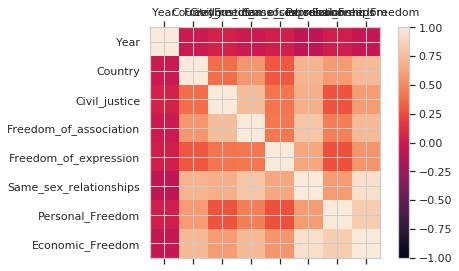

In [18]:
def visualize1(data):
    correlations = data.corr()
    corr = display(correlations)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    subplotsize=[8.,8.]
    figuresize=[10.,10.]   
    left = 0.5*(1.-subplotsize[0]/figuresize[0])
    right = 1.-left
    bottom = 0.5*(1.-subplotsize[1]/figuresize[1])
    top = 1.-bottom
    fig.subplots_adjust(left=left,right=right,bottom=bottom,top=top)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,8,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data)
    ax.set_yticklabels(data)
    chart1 = plt.show()
    return correlations, chart1

corr, chart1 = visualize1(data)

IndexError: list index out of range

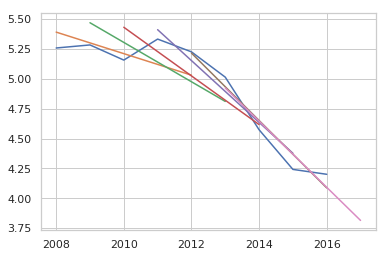

In [26]:
def visualize2(data):
    data_plot = [[5.257879, 2008, 12],
                 [5.283514, 2009, 12],
                 [5.156619, 2010, 12],
                 [5.332458, 2011, 12],
                 [5.225650, 2012, 12],
                 [5.013857, 2013, 12],
                 [4.573730, 2014, 12],
                 [4.241750, 2015, 12],
                 [4.200724, 2016, 12]]
    freedom = [i[0] for i in data_plot]
    years = [i[1] for i in data_plot]
    chart2 = plt.plot(years, freedom)
    #return plt.plot(years, freedom)
    for i in range(0, len(data)-3):
        # interpolate values
        # you can choose for yourself how many point should be taken into account
        # as well as the degree of interpolation (the last variable mentioned)
        z = polyfit(years[i:i+7],freedom[i:i+7], 1)
        p = poly1d(z)
        # extrapolate interpolation by 1
        start_year = years[i]
        end_year = years[i+3] + 1
        # plot values 
        x = linspace(start_year, end_year, 10)
        y = p(x)
        plt.plot(x, y)
    chart3 = plt.show()
    return chart2, chart3

chart2, chart3 = visualize2(data)

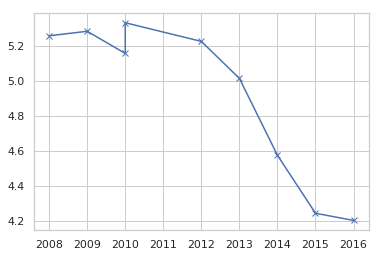

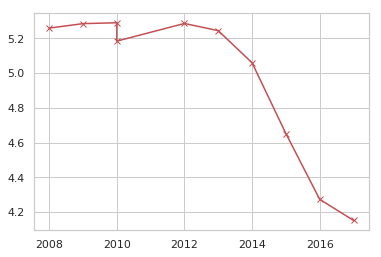

In [20]:
def visualize3(data):
    data_year = [2008,2009,2010,2010,2012,2013,2014,2015,2016]
    data_freedom = [5.257879,5.283514,5.156619,5.332458,5.225650,5.013857,4.573730,4.241750,4.200724]
    def holt_alg(h, y_last, y_pred, T_pred, alpha, beta):
        pred_y_new = alpha * y_last + (1-alpha) * (y_pred + T_pred * h)
        pred_T_new = beta * (pred_y_new - y_pred)/1 + (1-beta)*T_pred
        return (pred_y_new, pred_T_new)
    def smoothing(t, y, alpha, beta):
        pred_y = y[1]
        pred_T = (y[1] - y[0])/(t[1]-t[0])
        y_hat = [y[0], y[1]]
        t.append(t[-1]+1)
        for i in range(2, len(t)):
            h = t[i] - t[i-1]
            pred_y, pred_T = holt_alg(h, y[i-1], pred_y, pred_T, alpha, beta)
            y_hat.append(pred_y)
        return y_hat 
    pred = plt.plot(data_year, data_freedom, 'x-')
    plt.show(True)
    pred_y = smoothing(data_year, data_freedom, alpha=.8, beta=.5)
    plt.plot(data_year[:len(pred_y)], pred_y, 'rx-')
    chart4 = plt.show()
    return chart4

chart4 = visualize3(data)

In [ ]:
cleaned = data.to_csv('cleaned.csv', index=False)

def save(data):
    cleaned = data.to_csv('cleaned.csv', index=False)
    return cleaned

cleaned = save(data)